In [9]:
from keras import backend as K # 兼容不同后端的代码
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20,kernel_size=5,padding='same',input_shape=input_shape,activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

        model.add(Conv2D(50,kernel_size=5,padding='same',activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

        model.add(Flatten())
        model.add(Dense(500, activation='relu'))

        model.add(Dense(classes,activation='softmax'))
        return model

In [11]:
train = pd.read_csv('train.csv')
y_train_full = train['label']
X_train_full = train.drop(['label'], axis=1)
X_test = pd.read_csv('test.csv')

In [12]:
X_train_full.shape

(42000, 784)

In [35]:
X_train = np.array(X_train_full).reshape(42000,28,28) / 255.0
y_train = y_train_full

In [23]:
from PIL import Image
img = Image.fromarray(np.uint8(np.array(X_train_full)[0].reshape(28,28)))
# img.show()
# print(np.uint8(np.array(X_train_full)[0].reshape(28,28)))

In [41]:
model = LeNet.build(input_shape=(1, 28, 28), classes=10)


ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_12/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](conv2d_13/Relu)' with input shapes: [?,1,28,20].

In [42]:
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt, metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128,
                    validation_split=0.2)

Epoch 1/20


ValueError: in user code:

    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 28, 28]


In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

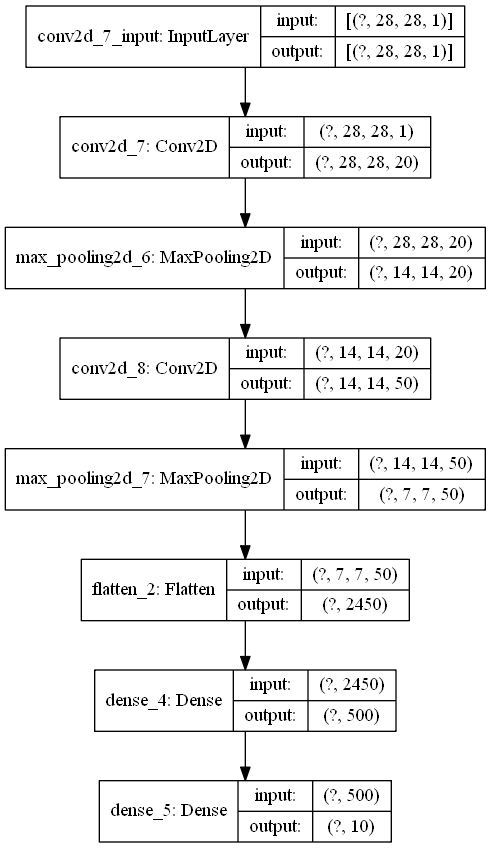

In [30]:
from keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
y_pred = model.predict(X_test)
pred = y_pred.argmax(axis=1).reshape(-1)
print(pred.shape)

In [ ]:
image_id = pd.Series(range(1,len(pred)+1))
output = pd.DataFrame({'ImageId':image_id, 'Label':pred})
output.to_csv("submission_NN.csv",  index=False)